In [1]:
import cv2, numpy as np
import math
import time
import random
from matplotlib import pyplot as plt
%matplotlib inline
# import imutils
import qrcode
from pyzbar.pyzbar import decode
from bokeh.plotting import figure
from bokeh.io import output_notebook, show, push_notebook


output_notebook()


def imshow(tit, image) :
    plt.title(tit)    
    if len(image.shape) == 3 :
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    else :
        plt.imshow(image, cmap="gray")
    plt.show()
    
    
def create_win(frames, scale=1.0) :    
    global myImage
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA) # because Bokeh expects a RGBA image
    fr=cv2.flip(fr, -1) # because Bokeh flips vertically
    width=fr.shape[1]
    height=fr.shape[0]    

    p = figure(x_range=(0,width), y_range=(0,height), output_backend="webgl", width=int(width*scale), height=int(height*scale))    
    myImage = p.image_rgba(image=[fr], x=0, y=0, dw=width, dh=height)
    show(p, notebook_handle=True)   
    
    
def update_win(frames) :
    
    all = []
    for f in frames :
        if len(f.shape ) !=  3 : f = cv2.cvtColor(f, cv2.COLOR_GRAY2BGR)
        all.append(f)
    frame = np.vstack(all)
    
    fr=cv2.cvtColor(frame, cv2.COLOR_BGR2RGBA)
    fr=cv2.flip(fr, -1)
    myImage.data_source.data['image']=[fr]
    push_notebook()
    time.sleep(0.05)

Loading BokehJS ...

float32
(600, 868)
-0.005183762
0.010007294


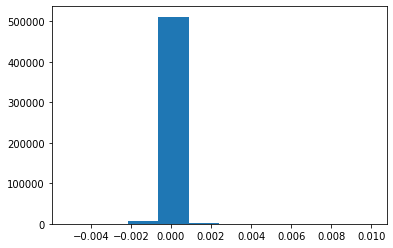

In [2]:
src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)

# 분석할 이미지(보통 gray), block 크기(3X3) 크면 점 개수 ↓, 소벨필터크기, 
# k=0.04~0.06 R=Det() - kTr(), R이 0이면 코너가 없다는 뜻. k값을 조정하여 결정.
harris = cv2.cornerHarris(src, 3, 3, 0.04)

print(harris.dtype)
print(harris.shape)
print(np.min(harris))
print(np.max(harris))
plt.hist(harris.ravel())
plt.show()

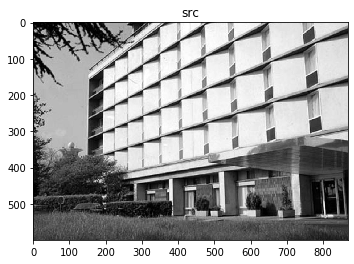

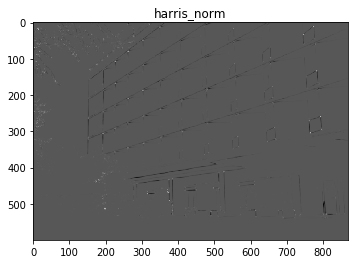

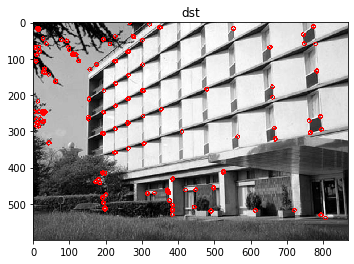

In [3]:
harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # CV_8U = uint8

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

In [4]:
# numpy에서 bool값으로 마스킹 하는 방식 예시.
a=np.array([[1,2,4],[7,0,1]])
print(a)

b= a > 3
print(b)

a[b] = 100
print(a)

[[1 2 4]
 [7 0 1]]
[[False False  True]
 [ True False False]]
[[  1   2 100]
 [100   0   1]]


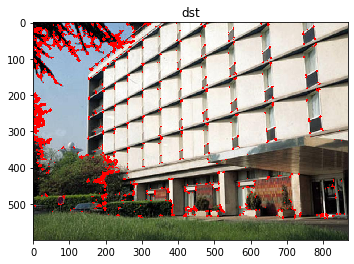

In [5]:
# 최대값의 %로 마스킹 변환
gray = cv2.imread('building.jpg', 0)
img = cv2.imread('building.jpg')

dst = cv2.cornerHarris(gray, 5, 3, 0.04)

img[dst > 0.01 * dst.max()]=[0,0,255]
imshow('dst', img)

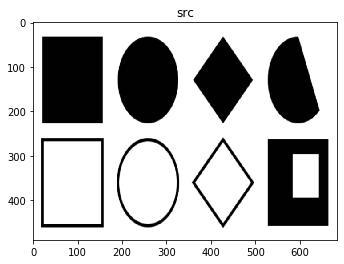

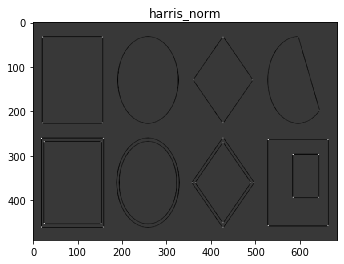

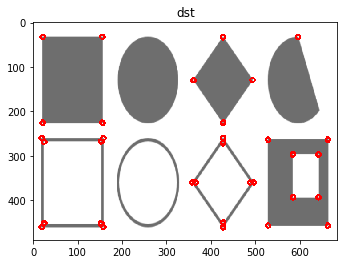

In [6]:
src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

# 분석할 이미지(보통 gray), block 크기(3X3) 크면 점 개수 ↓, 소벨필터크기, 
# k=0.04~0.06 R=Det() - kTr(), R이 0이면 코너가 없다는 뜻. k값을 조정하여 결정.
harris = cv2.cornerHarris(src, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # CV_8U = uint8

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 70:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

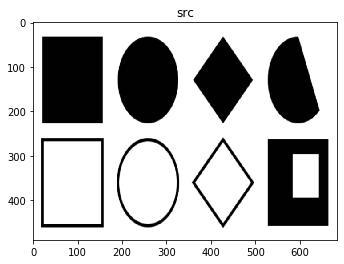

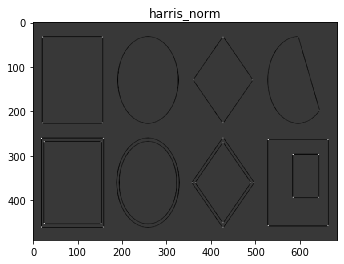

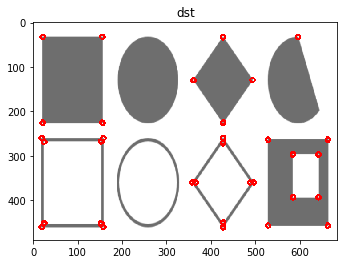

In [7]:
src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)

# 분석할 이미지(보통 gray), block 크기(3X3) 크면 점 개수 ↓, 소벨필터크기, 
# k=0.04~0.06 R=Det() - kTr(), R이 0이면 코너가 없다는 뜻. k값을 조정하여 결정.
harris = cv2.cornerHarris(src, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # CV_8U = uint8

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 70:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

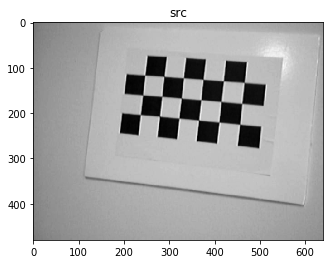

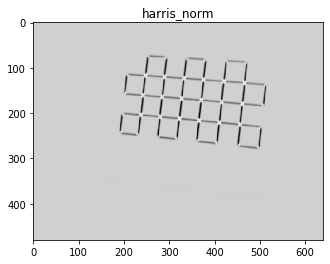

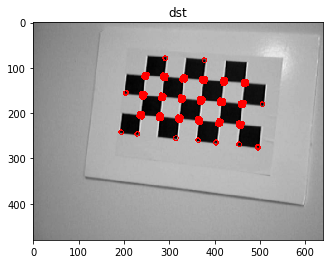

In [8]:
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)
src_blur = cv2.GaussianBlur(src, (15,15), 0)

# 분석할 이미지(보통 gray), block 크기(3X3) 크면 점 개수 ↓, 소벨필터크기, 
# k=0.04~0.06 R=Det() - kTr(), R이 0이면 코너가 없다는 뜻. k값을 조정하여 결정.
harris = cv2.cornerHarris(src_blur, 3, 3, 0.04)

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # CV_8U = uint8

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 230:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

92
(254.0, 75.0)


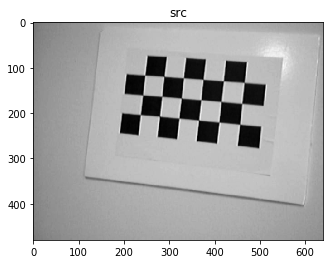

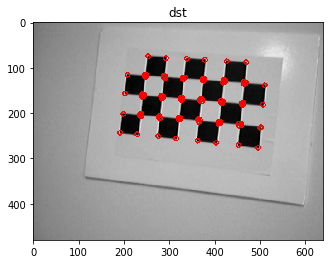

In [9]:
# 더 쉽게 코너 찾을 수 있는 방법. 파라미터가 단 한개! FastFeatureDetector_create

# src = cv2.imread('building.jpg', cv2.IMREAD_GRAYSCALE)
src = cv2.imread('chessBoard.jpg', cv2.IMREAD_GRAYSCALE)

fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출됨, 원에서도 검출되지만 중첩돼서 검출될수 있음.
keypoints = fast.detect(src)

print(len(keypoints))
print(keypoints[0].pt)

x, y = keypoints[0].pt

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(dst, pt, 5, (0, 0, 255), 2)

imshow('src', src)
imshow('dst', dst)

# 92개가 검출되었음.

(480, 640)


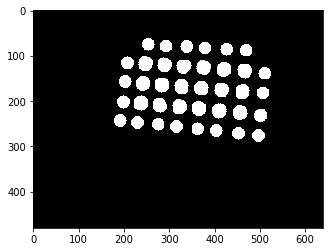

In [10]:
mask = np.zeros(src.shape, dtype='uint8')
print(mask.shape)

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(mask, pt, 14, (255, 255, 255), -1)
        
imshow("", mask)

38


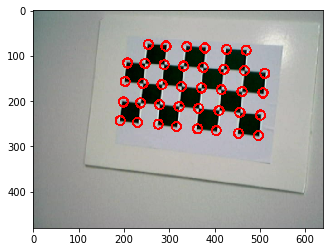

[[497, 276], [453, 271], [404, 265], [363, 261], [316, 256], [276, 251], [230, 247], [192, 243], [502, 231], [456, 225], [410, 221], [365, 216], [322, 212], [279, 208], [237, 204], [199, 202], [507, 182], [461, 179], [415, 175], [371, 171], [327, 168], [284, 164], [242, 161], [203, 157], [511, 139], [466, 133], [421, 130], [375, 126], [332, 123], [289, 120], [208, 116], [247, 117], [470, 88], [427, 86], [379, 83], [339, 80], [293, 79], [254, 75]]


In [11]:
contours, _ = cv2.findContours(mask, cv2.RETR_TREE,
                cv2.CHAIN_APPROX_SIMPLE)

print(len(contours))

src = cv2.imread('chessboard.jpg')
points = []
for con in contours :
    M = cv2.moments(con, True) #무게중심 구하는 법.
    #print(M)
    cx  = int(M['m10'] / M['m00']) #무게중심 구하는 법.
    cy  = int(M['m01'] / M['m00']) #무게중심 구하는 법.
    cv2.circle(src, (cx,cy ), 10, (0,0, 255), 3)          
    points.append([cx, cy ])
imshow("", src)
print(points)

0


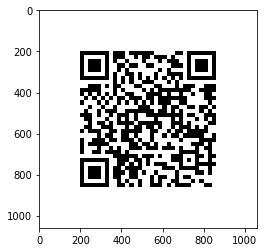

In [12]:
# 이 부분 건너뜀. 왜 안되는지 모름
src = cv2.imread('acronet.png')
gray = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)
fast = cv2.FastFeatureDetector_create(50)  # 작아지면 코너 많이 검출됨, 원에서도 검출되지만 중첩돼서 검출될수 있음.
keypoints = fast.detect(gray)
print(len(keypoints))

for kp in keypoints:
        pt = (int(kp.pt[0]), int(kp.pt[1]))
        cv2.circle(src, pt, 5, (0, 0, 255), 2)
        
imshow('', src)

float32
(1060, 1060)
-0.017777782
0.09719138


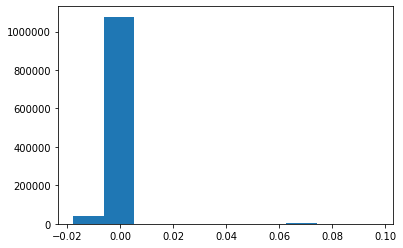

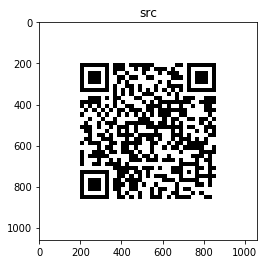

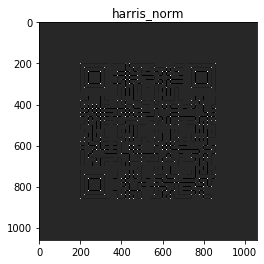

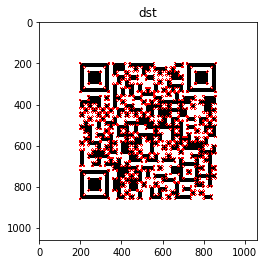

In [13]:
src = cv2.imread('acronet.png', cv2.IMREAD_GRAYSCALE)

# 분석할 이미지(보통 gray), block 크기(3X3) 크면 점 개수 ↓, 소벨필터크기, 
# k=0.04~0.06 R=Det() - kTr(), R이 0이면 코너가 없다는 뜻. k값을 조정하여 결정.
harris = cv2.cornerHarris(src, 3, 3, 0.04)

print(harris.dtype)
print(harris.shape)
print(np.min(harris))
print(np.max(harris))
plt.hist(harris.ravel())
plt.show()

harris_norm = cv2.normalize(harris, None, 0, 255, cv2.NORM_MINMAX, cv2.CV_8U) # CV_8U = uint8

dst = cv2.cvtColor(src, cv2.COLOR_GRAY2BGR)

for y in range(harris_norm.shape[0]):
        for x in range(harris_norm.shape[1]):
            if harris_norm[y, x] > 120:
                    cv2.circle(dst, (x, y), 5, (0, 0, 255), 2)

imshow('src', src)
imshow('harris_norm', harris_norm)
imshow('dst', dst)

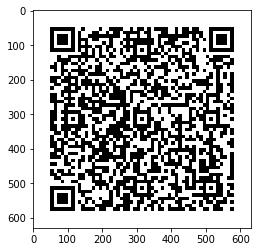

In [14]:
qr = qrcode.QRCode(version = 2,
     error_correction = qrcode.constants.ERROR_CORRECT_H,
     box_size = 10,
     border = 5)

url = 'https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8'
qr.add_data(url)

qr.make()

img = qr.make_image(fill_color="black", back_color="white")

plt.imshow(img, cmap="gray")
img.save("qrcode.jpg")

https://search.naver.com/search.naver?sm=top_hty&fbm=0&ie=utf8&query=%EC%84%9C%EC%9A%B8+%EB%82%A0%EC%94%A8
[[[ 50.      50.    ]]

 [[578.9867  50.    ]]

 [[586.     579.    ]]

 [[ 50.     579.    ]]]


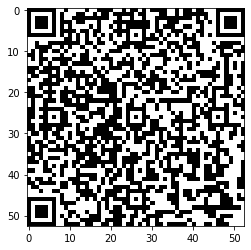

In [15]:
image = cv2.imread('qrcode.jpg')

qrDecoder = cv2.QRCodeDetector()
data, bbox, rectifiedImage = qrDecoder.detectAndDecode(image)

print(data) # 주소값
print(bbox) # 위치
imshow('', rectifiedImage) # 이미지

[Decoded(data=b'http://pyimg.co/dl4cv', type='QRCODE', rect=Rect(left=331, top=225, width=103, height=103), polygon=[Point(x=331, y=225), Point(x=331, y=327), Point(x=434, y=328), Point(x=433, y=225)]), Decoded(data=b'https://www.pyimagesearch.com/', type='QRCODE', rect=Rect(left=89, top=66, width=119, height=120), polygon=[Point(x=89, y=66), Point(x=89, y=185), Point(x=208, y=186), Point(x=207, y=66)]), Decoded(data=b'https://openmv.io/', type='QRCODE', rect=Rect(left=441, top=70, width=122, height=122), polygon=[Point(x=441, y=71), Point(x=441, y=191), Point(x=563, y=192), Point(x=562, y=70)]), Decoded(data=b'0100000000020183', type='DATABAR', rect=Rect(left=292, top=786, width=181, height=94), polygon=[Point(x=292, y=787), Point(x=292, y=879), Point(x=473, y=880), Point(x=473, y=786)]), Decoded(data=b'DL4CV', type='CODE39', rect=Rect(left=294, top=632, width=177, height=98), polygon=[Point(x=294, y=633), Point(x=294, y=729), Point(x=471, y=730), Point(x=471, y=632)]), Decoded(data=b

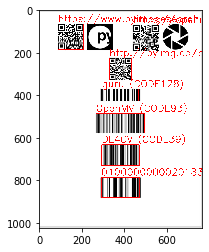

In [16]:
image = cv2.imread('barqr.jpg')
#image = cv2.GaussianBlur(image, (51,51), 0)  어디까지 가능한지 테스트
#image = cv2.imread('barqr.jpg')
code = decode(image)
print(code)

for barcode in code:
    (x, y, w, h) = barcode.rect
    cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)
 
    barcodeData = barcode.data.decode("utf-8")
    barcodeType = barcode.type
 
    text = "{} ({})".format(barcodeData, barcodeType)
    cv2.putText(image, text, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX,
        1.5, (0, 0, 255), 2) 
imshow("", image)

len(keypoints): 20
desc.shape: (500, 32)


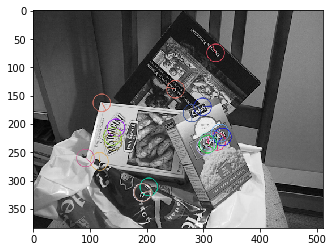

[ 93  89 127 161 134  90 182 224 108  96 119 162  95  30 163  41  51 213
 164 243  85 181  45 110 254 167  99  71 229  59  45  71]


In [17]:
# ORB 범위와 방향을 동시에 표현
src = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)
# src = cv2.imread('corner.png', cv2.IMREAD_GRAYSCALE)
orb = cv2.ORB_create()

# keypoints : 점의 위치
# desc : 점의 개수, 32바이트(크기)
keypoints = orb.detect(src)
keypoints, desc = orb.compute(src, keypoints)

keypoints = keypoints[0:20]
print('len(keypoints):', len(keypoints))
print('desc.shape:', desc.shape)


dst = cv2.drawKeypoints(src, keypoints, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow('', dst)
print(desc[0])

desc1.shape: (453, 32)
desc2.shape: (500, 32)


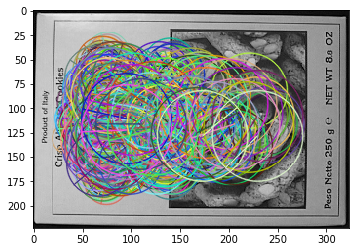

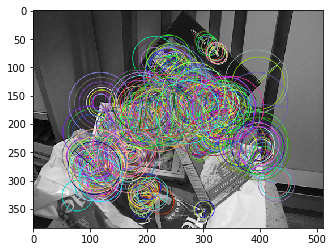

In [18]:
# ORB를 이용해 두개의 사진의 공통점 찾기
src1 = cv2.imread('box.png', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('box_in_scene.png', cv2.IMREAD_GRAYSCALE)

orb = cv2.ORB_create()

keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

keypoints, desc = orb.compute(src, keypoints)

print('desc1.shape:', desc1.shape)
print('desc2.shape:', desc2.shape)


dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

imshow('',dst1)
imshow('',dst2)

In [19]:
# 좌표
# 특성

print(keypoints1[171].pt)
print(desc1[171])

print(keypoints2[171].pt)
print(desc2[171])

(56.400001525878906, 134.40000915527344)
[103 153 226  94 193 208  86 176 121  66 254  18 106 254  46 116  93 250
 182 194 221  47 246 227  19  62 144  75 127 173 248  70]
(121.20000457763672, 297.6000061035156)
[169  30  14  49 184 251 145 119 188 239 246 253 159   6 130 153 206  34
 206  52 189 207  97  12 236 195 122 209 202  76 175 217]


453
0
487
86.0
(83.0, 78.0)
(343.9854736328125, 186.32545471191406)


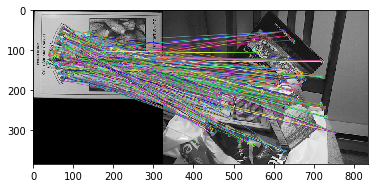

In [20]:
matcher = cv2.BFMatcher(cv2.NORM_HAMMING) #NORM_HAMMING : 2진화 시켜서 차이 비교하기.
matches = matcher.match(desc1, desc2)

print(len(matches))
# desc1.shape: (453, 32)
# desc2.shape: (500, 32) 두개의 값중 최소값인 453이 출력됨.

print(matches[0].queryIdx) # 매치된것(0번째) 중 desc1의 첫번째 인덱스 
print(matches[0].trainIdx) # 매치된것(0번쨰) 중 desc2의 첫번째 인덱스
print(matches[0].distance) # 매치된것(0번째) 값에서의 차이. 클수록 엉뚱한 점에 매치되었다는 뜻.

# 매치된 것들의 사진 속 실제 좌표
print(keypoints1[matches[0].queryIdx].pt)
print(keypoints2[matches[0].trainIdx].pt)

# for i in len(matches):
#     print(matches[0].distance)

dst = cv2.drawMatches(src1, keypoints1, src2, keypoints2, matches, None)
imshow('', dst)

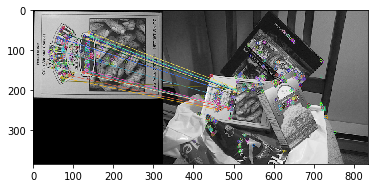

True

In [21]:
# 차이가 가장 적은 것들만 뽑아서 사진 매치시키기
matches = sorted(matches, key=lambda x : x.distance)
good_matches = matches[:20]

dst2 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('', dst2)
cv2.imwrite('box_match.png', dst2)

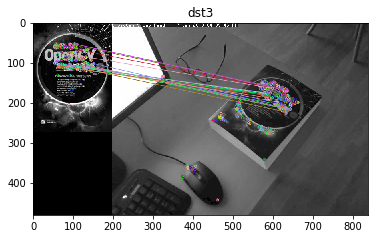

True

In [22]:
# 매치시키기 다른 예제
src1 = cv2.imread('book3.jpg', cv2.IMREAD_GRAYSCALE)
src2 = cv2.imread('book3_1.jpg', cv2.IMREAD_GRAYSCALE)
    
orb = cv2.ORB_create()
keypoints1, desc1 = orb.detectAndCompute(src1, None)
keypoints2, desc2 = orb.detectAndCompute(src2, None)

dst1 = cv2.drawKeypoints(src1, keypoints1, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)
dst2 = cv2.drawKeypoints(src2, keypoints2, None, (-1, -1, -1),
                       cv2.DrawMatchesFlags_DRAW_RICH_KEYPOINTS)

matcher = cv2.BFMatcher_create(cv2.NORM_HAMMING)
matches = matcher.match(desc1, desc2)

matches = sorted(matches, key=lambda x: x.distance)
good_matches = matches[:20]

dst3 = cv2.drawMatches(src1, keypoints1, src2, keypoints2, good_matches, None)

imshow('dst3', dst3)
cv2.imwrite("orb3.png", dst3)

In [26]:
files = ['pic1.jpg','pic2.jpg']

imgs = []

for file in files :
    img = cv2.imread(file)
    imgs.append(img)
    
print(len(imgs))

2


In [24]:
# stitcher = cv2.Stitcher_create()
# status, dat = stitcher.stitch(imgs)
# cv2.imwrite('result.png', dat)
# imshow('', dat)